<a href="https://colab.research.google.com/github/EmilSeyfullayev/PashaHoldingTechnicalInterview/blob/main/Solutions_JDS_Technical_Interview_Pasha_Holding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# R2 vs MAPE (30 points)

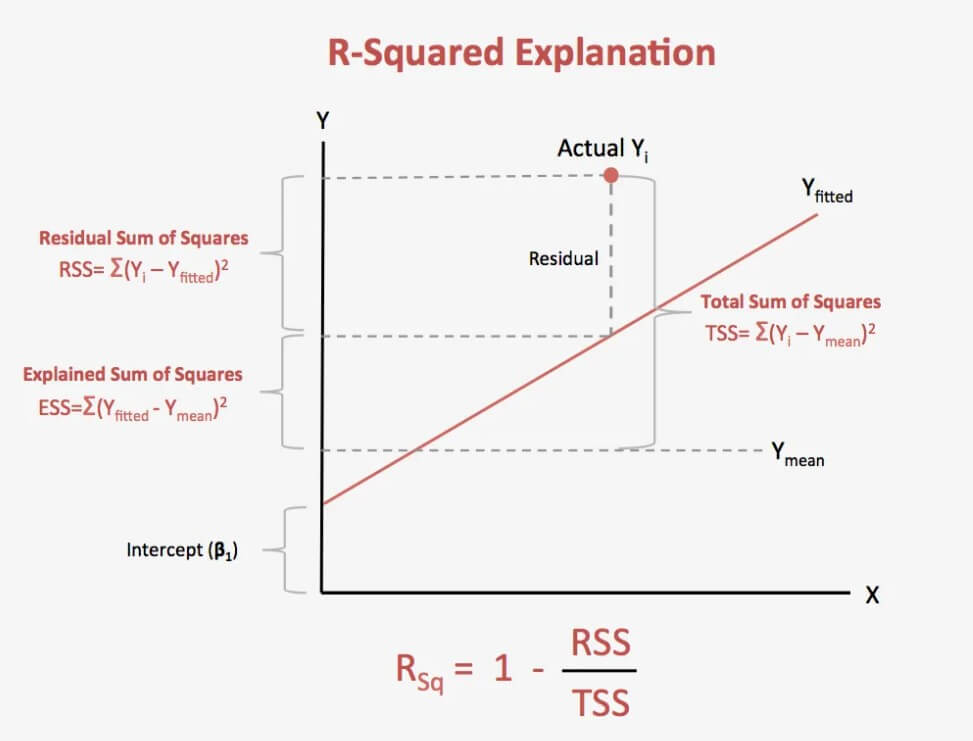

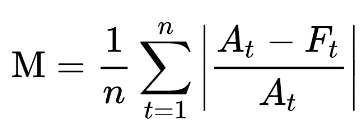

R squared is not an indicator of level of errors in predictions of the model, I will show you this with the example below.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [ ]:
x = np.linspace(1, 5, 100)  # generates 100 values with first value 1 and ending value 5
np.random.seed(42)          # setting seed in order to have the same output when generating random values
y = 2 + 1.2*x + np.random.normal(0, 0.5, 100) # calculating y with intercept, slope coeeficient and random noise

x = x.reshape(-1, 1)    # reshaping x, otherways it is not fitted

lm = LinearRegression() # initiate instance of Linear Regression
lm.fit(x, y)            # fitting data to the model

r_squared = round(lm.score(x, y)*100, 1)
predictions = lm.predict(x)
mape = round(mean_absolute_percentage_error(y, predictions) * 100, 1)
mae = round(mean_absolute_error(y, predictions), 2)

print(f'R^2 equals to: {r_squared}%')
print(f'MAPE equals to: {mape}%')
print(f'MAE equals to:  {mae}')

R^2 equals to: 90.8%
MAPE equals to: 7.1%
MAE equals to:  0.36


In the below example we will change only range of X. In the above example it ranged betwen 1 and 5. In the below example it ranges between 1 and 1.6 (1.6 is choosen in order to suit our 20% and 10% case in task).

In [ ]:
x = np.linspace(1, 1.6, 100)  # generates 100 values with first value 1 and ending value 1.6
np.random.seed(42)            # setting seed in order to have the same output when generating random values
y = 2 + 1.2*x + np.random.normal(0, 0.5, 100) # calculating y with intercept, slope coeeficient and random noise 

x = x.reshape(-1, 1)    # reshaping x, otherways it is not fitted

lm = LinearRegression() # initiate instance of Linear Regression
lm.fit(x, y)            # fitting data to the model

r_squared = round(lm.score(x, y)*100, 1)
predictions = lm.predict(x)
mape = round(mean_absolute_percentage_error(y, predictions) * 100, 1)
mae = round(mean_absolute_error(y, predictions), 2)

print(f'R^2 equals to: {r_squared}%')
print(f'MAPE equals to: {mape}%')
print(f'MAE equals to:  {mae}')

R^2 equals to: 20.6%
MAPE equals to: 10.7%
MAE equals to:  0.36


As you can see, by changing the range of X our model performed equally well considering predictions (according to MAE score and MAPE score changed slighlty - its punishment works assymetricly, probably for this reason), but R squared score dropped hugely, from 90% to 20%. <br>

**So, I think, the answer to the question may lay down in the range of the predictor. Even if range of X is low, our model can be very accurate, and its low R^2 score is not an indicator of model performance**

# Cancer Detection Model (20 points)

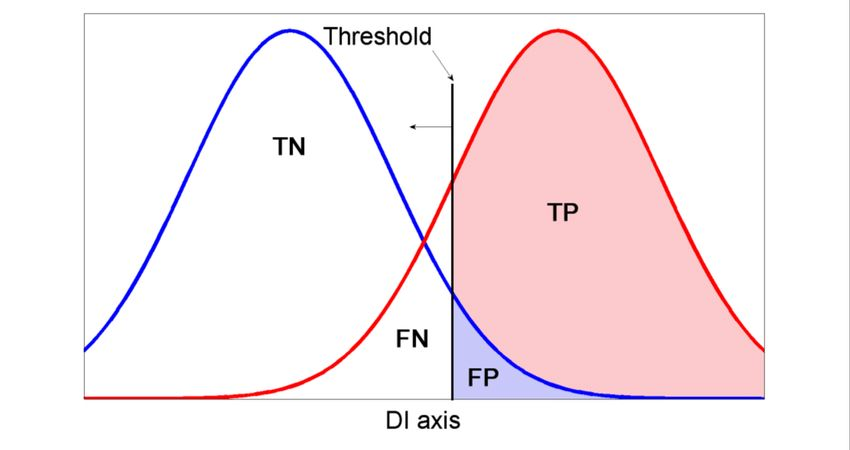

## Let's assume we encoded
*   0 as "No cancer" - Negative
*   1 as "With cancer" - Positive <br>
### Our huge mistake would happen if we have high proportion of False Negatives; other way to say, if our model predicts patient does not have cancer but he in fact has, it will be much ruder mistake than other way around. 0 and 1 do not weigh the same, one class is more important than the other. 
### I think, in order to decrease False Negatives we have to decrease threshold, as it is shown in picture. So, a number of healthy patients will be predicted as with cancer, but almost no patients with cancer will be predicted as healthy. Thus, we want to minimize False Negatives, that is to decrease number of patients with cancer which model predicts as healthy. In addition, we want proportion of True Positive (TP) be high, i.e. our model predicts 1 (with cancer) to patients who are really with cancer. As a result, we need our False Negative Rate (FNR) be small. Its formula is FNR = FN/(FN+TP). So, we we have to choose FNR as a performance metric.





# Imputing missing values (30 points)

In [3]:
df = pd.read_excel('Imputing Missing values.xlsx')

In [ ]:
df

,EmployeeID,Experience (in years),Age,Salary
0,1,5,31,2100.0
1,2,10,40,3700.0
2,3,1,24,4900.0
3,4,1,24,700.0
4,5,2,26,NaN
5,6,3,27,1100.0
6,7,2,25,850.0
7,8,8,30,3000.0
8,9,4,28,1900.0
9,10,7,29,2400.0


In [4]:
df.drop('EmployeeID',axis=1, inplace=True)

In [ ]:
temp = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Experience (in years)  10 non-null     int64  
 1   Age                    10 non-null     int64  
 2   Salary                 9 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 368.0 bytes


### Let's see correlations

In [7]:
df.corr()['Salary'].iloc[:-1].reset_index()

,index,Salary
0,Experience (in years),0.347874
1,Age,0.349605


### Let's see some visualisations

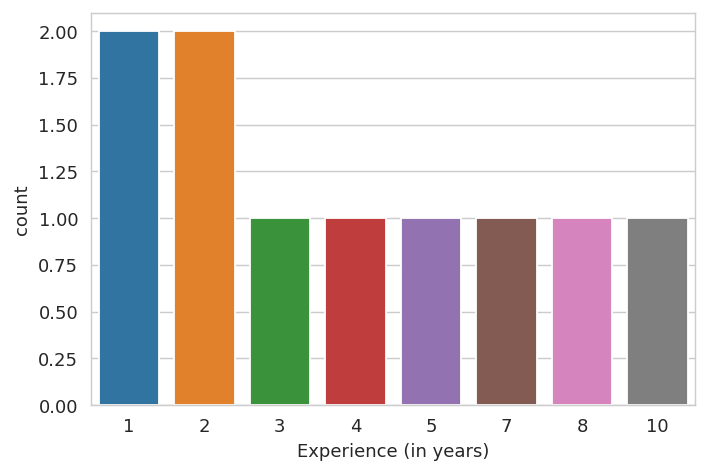

In [8]:
plt.figure(dpi=130)
sns.countplot(x=df['Experience (in years)'])
plt.show()

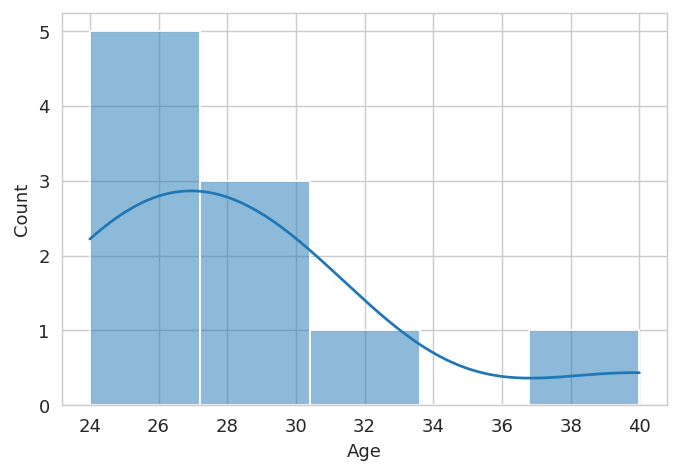

In [9]:
plt.figure(dpi=130)
sns.histplot(x=df['Age'], kde=True)
plt.show()

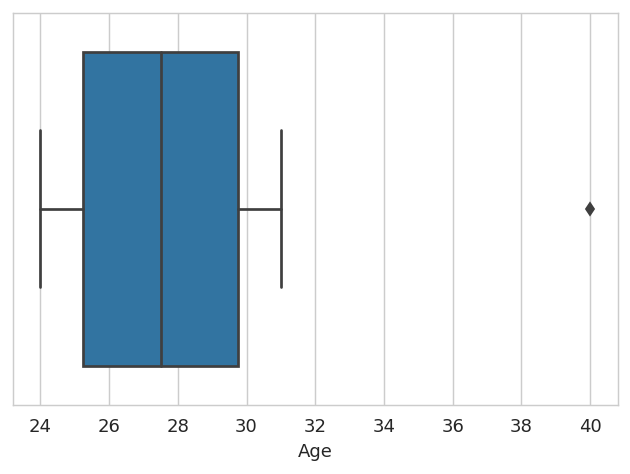

In [10]:
plt.figure(dpi=130)
sns.boxplot(x=df['Age'])
plt.show() # we have an outlier

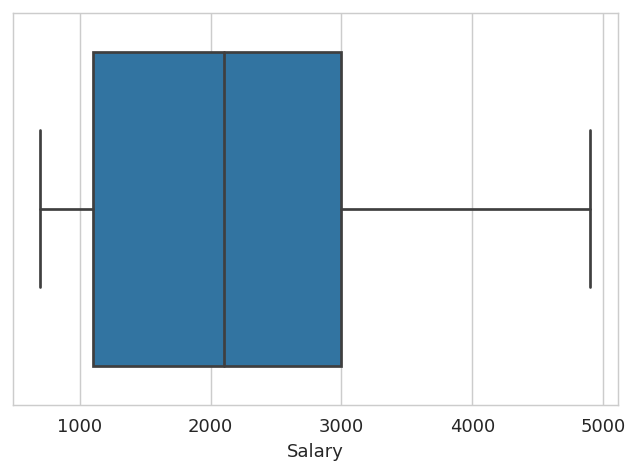

In [11]:
plt.figure(dpi=130)
sns.boxplot(x=df['Salary'])
plt.show() # we have no outliers

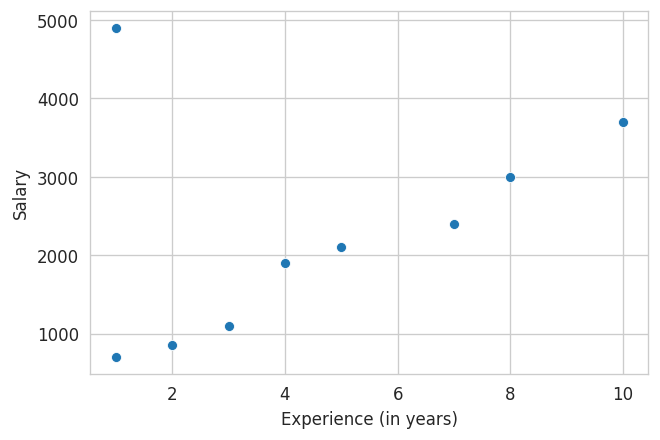

In [ ]:
# We can see linearity with an outlier in the left upper corner
# But this would not be an outlier if the experience year was 12 years, for example
# So, this is an outlier which is not calculated with interquantile ranges or smth like this
plt.figure(dpi=120)
sns.scatterplot(x=df['Experience (in years)'], y=df['Salary'])
plt.show()

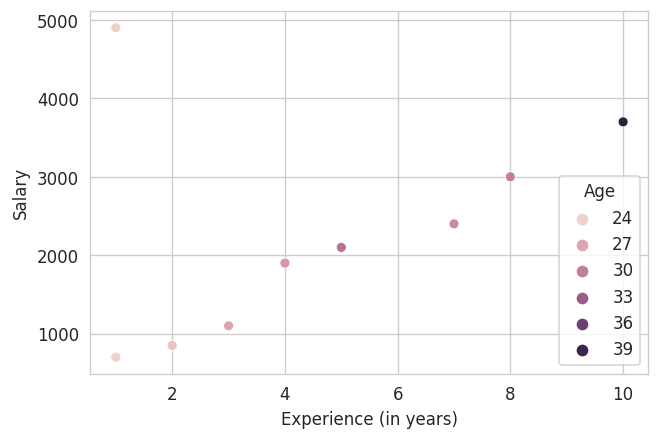

In [ ]:
# Also there is an outlier in right upper corner
plt.figure(dpi=120)
sns.scatterplot(x=df['Experience (in years)'], y=df['Salary'], hue=df['Age'])
plt.show()

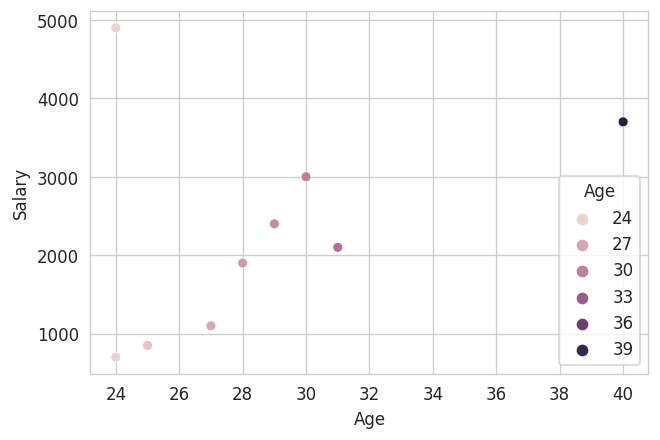

In [ ]:
# the same issue
# Outliers in left and right upper corners
plt.figure(dpi=120)
sns.scatterplot(x=df['Age'], y=df['Salary'], hue=df['Age'])
plt.show()

The dataset is small so we can see easily otliers based on multiple variables. But let's treat as if dataset is huge and we cannot detect indexes of outliers (or better called anomalies).

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
iso_forest = IsolationForest(random_state = 42)

anomaly_predictions = iso_forest.fit_predict(temp[["Age", 'Experience (in years)', "Salary"]])
temp["anomalies"] = anomaly_predictions
temp["anomalies"] = temp["anomalies"].astype(str)
temp["anomaly_score"] = iso_forest.decision_function(temp[["Age", 'Experience (in years)', "Salary"]])

In [ ]:
print(temp["anomalies"].value_counts())

1     7
-1    2
Name: anomalies, dtype: int64


In [ ]:
temp

,Experience (in years),Age,Salary,anomalies,anomaly_score
0,5,31,2100.0,1,0.040865
1,10,40,3700.0,-1,-0.139546
2,1,24,4900.0,-1,-0.064065
3,1,24,700.0,1,0.007596
5,3,27,1100.0,1,0.050320
6,2,25,850.0,1,0.039455
7,8,30,3000.0,1,0.028458
8,4,28,1900.0,1,0.067309
9,7,29,2400.0,1,0.061279


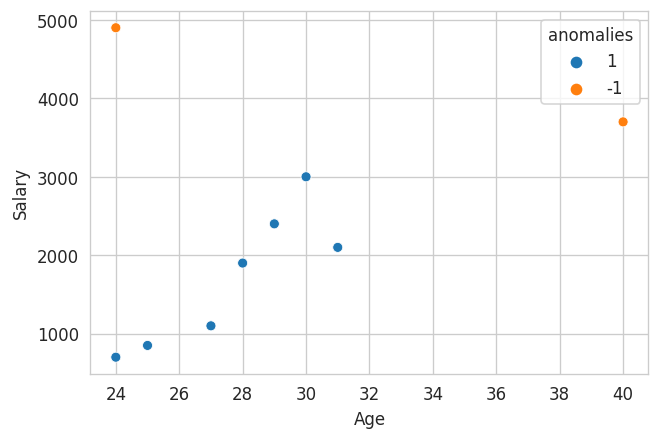

In [ ]:
plt.figure(dpi=120)
sns.scatterplot(x = temp['Age'], y = temp['Salary'], hue=temp['anomalies'])
plt.show()

In [ ]:
checkpoint_1 = df.copy()

In [ ]:
df = temp[temp['anomalies'] == '1']

### Let's build a linear model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
X = df[['Experience (in years)', 'Age']]
y = df['Salary']
lm.fit(X, y)

LinearRegression()

In [ ]:
lm.score(X, y) # As we now have no anomalies, we have very good linearity and model

0.9638871714067835

In [ ]:
checkpoint_1[checkpoint_1['Salary'].isna()][['Experience (in years)', 'Age']]

,Experience (in years),Age
4,2,26


In [ ]:
predicted_salary = round(
    lm.predict(
        checkpoint_1[checkpoint_1['Salary'].isna()][['Experience (in years)', 'Age']]
    )[0], -2
)
print(f'Predicted salary for missing value is: {predicted_salary}')

Predicted salary for missing value is: 1000.0


In [ ]:
df.corr().iloc[:-2,2].reset_index() # after dropping anomalies our correlations increased dramatically as well

,index,Salary
0,Experience (in years),0.977172
1,Age,0.881825


My answer is 1000. I did not use grouping and filling with means of groups because there is a high relationship among variables which is detected after dropping anomalies. Moreover, Experience has higher impact.

# Service Duration (20 points)

In [ ]:
df = pd.read_excel('Service Duration.xlsx')

In [ ]:
df

,Customer,Service Duration (in minutes)
0,1,15
1,2,18
2,3,23
3,4,14
4,5,19
5,6,95
6,7,14
7,8,28
8,9,26
9,10,20


In [ ]:
df.iloc[:, 1].describe(include='all')

count    10.000000
mean     27.200000
std      24.307292
min      14.000000
25%      15.750000
50%      19.500000
75%      25.250000
max      95.000000
Name: Service Duration (in minutes), dtype: float64

In [ ]:
# Very interesting, np.std() and df.describe()['std'] behave differently 
# The reason is in denomenator (n vs n-1)
np.std(df['Service Duration (in minutes)'])

23.05992194262591

In [ ]:
df.iloc[:, 1].describe(include='all')['std']

24.307292001464177

### Some visualisations

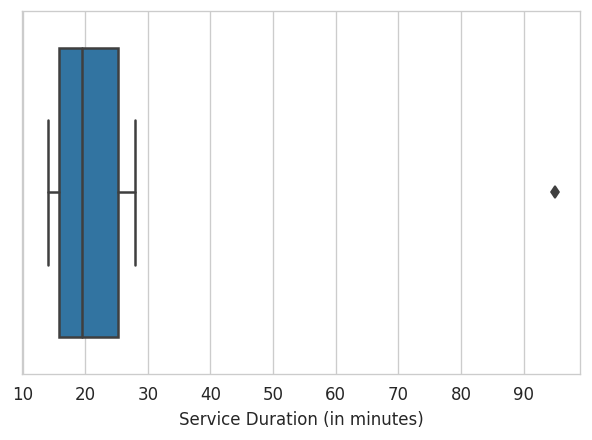

In [ ]:
plt.figure(dpi=120)
sns.boxplot(x = df['Service Duration (in minutes)'])
plt.show() # we have one outlier

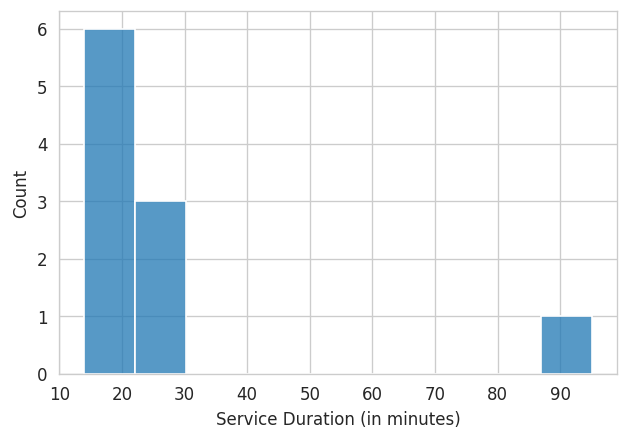

In [ ]:
plt.figure(dpi=120)
sns.histplot(x=df['Service Duration (in minutes)'])
plt.show()

### Let's calculate upper and lower fences of boxplot and see outliers

In [ ]:
df['service_duration_float'] = df['Service Duration (in minutes)'].apply(lambda x: float(x))

In [ ]:
Q1 = df['service_duration_float'].quantile(0.25)
Q3 = df['service_duration_float'].quantile(0.75)
IQR = Q3-Q1
upper_fence = Q3 + 1.5*IQR
print(f'Upper fence equals to: {upper_fence}')
lower_fence = Q1 - 1.5*IQR
print(f'Lower fence equals to: {lower_fence}')

Upper fence equals to: 39.5
Lower fence equals to: 1.5


### Abnormal services

In [ ]:
# Let's see observations which above upper fence OR below lower fence
# These observations are outliers or abnormal services in our case
df[
   (df['service_duration_float'] > upper_fence) |
   (df['service_duration_float'] < lower_fence)
]

,Customer,Service Duration (in minutes),service_duration_float
5,6,95,95.0


## Representative usual service time

In [ ]:
initial_mean = df['service_duration_float'].mean()
print(f'Initial mean value is: {initial_mean}')

Initial mean value is: 27.2


Solution 1

In [ ]:
# We can simply calculate median
median = df['service_duration_float'].median() #.quantile(0.5) <-gives the same output
print(f'Median value service durations is: {median}')

Median value service durations is: 19.5


Solution 2

In [ ]:
# We can replace outlier with upper fence and calculate mean value
df['service_duration_transformed'] = df['service_duration_float']
df.loc[
       df['service_duration_float'] > upper_fence, 'service_duration_transformed'
] = upper_fence

df[df['service_duration_float'] > upper_fence]

,Customer,Service Duration (in minutes),service_duration_float,service_duration_transformed
5,6,95,95.0,39.5


In [ ]:
# the mean value calculated with oulier transformation is 
mean_transformed = df['service_duration_transformed'].mean()
print(f'Mean value obtained after transformation is: {mean_transformed}')

Mean value obtained after transformation is: 21.65


Solution 3

In [ ]:
# calculating mean after dropping outlier
mean_after_dropping_outlier = round(
    df[
   ~(df['service_duration_float']>upper_fence)
]['service_duration_float'].mean(), 1
)

print(f'Mean value after dropping outlier is: {mean_after_dropping_outlier}')

Mean value after dropping outlier is: 19.7


In [ ]:
print(f'Initial mean value is: {initial_mean}')
print(f'Median value of service durations is: {median}')
print(f'Mean value obtained after reaasigning outlier to upper fence: {mean_transformed}')
print(f'Mean value after dropping outlier is: {mean_after_dropping_outlier}')

Initial mean value is: 27.2
Median value of service durations is: 19.5
Mean value obtained after reaasigning outlier to upper fence: 21.65
Mean value after dropping outlier is: 19.7


Old school would say to choose median value if there are outliers. In this case we would choose 19,5. <br> 

But I would choose 19,7 - mean value obtained after dropping outlier. Anyway, in both cases we drop outlier. Additionally, we can add here statement " ... with standard deviation of 4,8". I doubt we can do the same in above statement.<br>

**So that, our representative usual service time is 19,7 minutes and time can deviate from mean on average by 4,8 minutes.**

21,65 is also interesting value. In this case our standard deviation would be 7,5. This value, I think, is also worth of considering.

In [ ]:
# temp = df[
#    ~(df['service_duration_float']>upper_fence)
# ]

In [ ]:
np.std(df['service_duration_float']) # 23
# np.std(df['service_duration_transformed']) #7.5
# np.std(temp['service_duration_float']) # 4.8

23.05992194262591

In [ ]:
df

,Customer,Service Duration (in minutes),service_duration_float,service_duration_transformed
0,1,15,15.0,15.0
1,2,18,18.0,18.0
2,3,23,23.0,23.0
3,4,14,14.0,14.0
4,5,19,19.0,19.0
5,6,95,95.0,39.5
6,7,14,14.0,14.0
7,8,28,28.0,28.0
8,9,26,26.0,26.0
9,10,20,20.0,20.0
